In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

# The data（before transformation）

Only 7 predictors left after feature selection and removing highly correlated features

bathroomcnt(bedroomcnt,roomcnt are removed due to high correlation, bathroomcnt is kept because of its high feature importance)

calculatedfinishedsquarefeet

lotsizesquarefeet

propertylandusetypeid

yearbuilt

dist_to_dtla

dist_to_ocean


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
# read saved train data: imputed X by univariate
df = pd.read_csv('/accounts/grad/hngxinrui/univariate_imputed__full_data.csv')

In [10]:
#only 7 predictors left after dropping highly correlated features
columns = ["bathroomcnt", "calculatedfinishedsquarefeet", "lotsizesquarefeet", "propertylandusetypeid",
          "yearbuilt", "dist_to_dtla", "dist_to_ocean", "price"]
lm = pd.DataFrame(df, columns=columns)

In [11]:
print(lm.shape)
lm.head(5)

(2961361, 8)


,bathroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,propertylandusetypeid,yearbuilt,dist_to_dtla,dist_to_ocean,price
0,0.0,73026.0,63085.0,47.0,64,9.152931,4.340954,1.743495e+06
1,0.0,5068.0,7521.0,47.0,75,12.661995,43.593469,1.220221e+06
2,0.0,1776.0,8512.0,31.0,76,12.634968,50.087402,4.798860e+05
3,0.0,2400.0,2500.0,31.0,80,11.263157,46.842204,3.068900e+05
4,0.0,1576.0,7000.0,260.0,68,8.094312,48.508329,5.677441e+05


In [12]:
# do a 80,20 split on each data, set a seed
import random
random.seed(222)
from sklearn.model_selection import train_test_split

train, test = train_test_split(lm, test_size=0.2)

#full data
X_train = train.drop(['price'], axis =1)
Y_train = train['price']
X_test = test.drop(['price'], axis =1)
Y_test = test['price']

In [13]:
#datasets for linear models
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2369088, 7)
(2369088,)
(592273, 7)
(592273,)


## The model

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=Y_train,y_pred=y_pred)))

R squared: 0.2863050678320389


## Linear Assumption 

**1.Linearity**

Linear regression needs the relationship between the independent and dependent variables to be linear.

propertylandusetypeid is not plotted because it's categorical. 

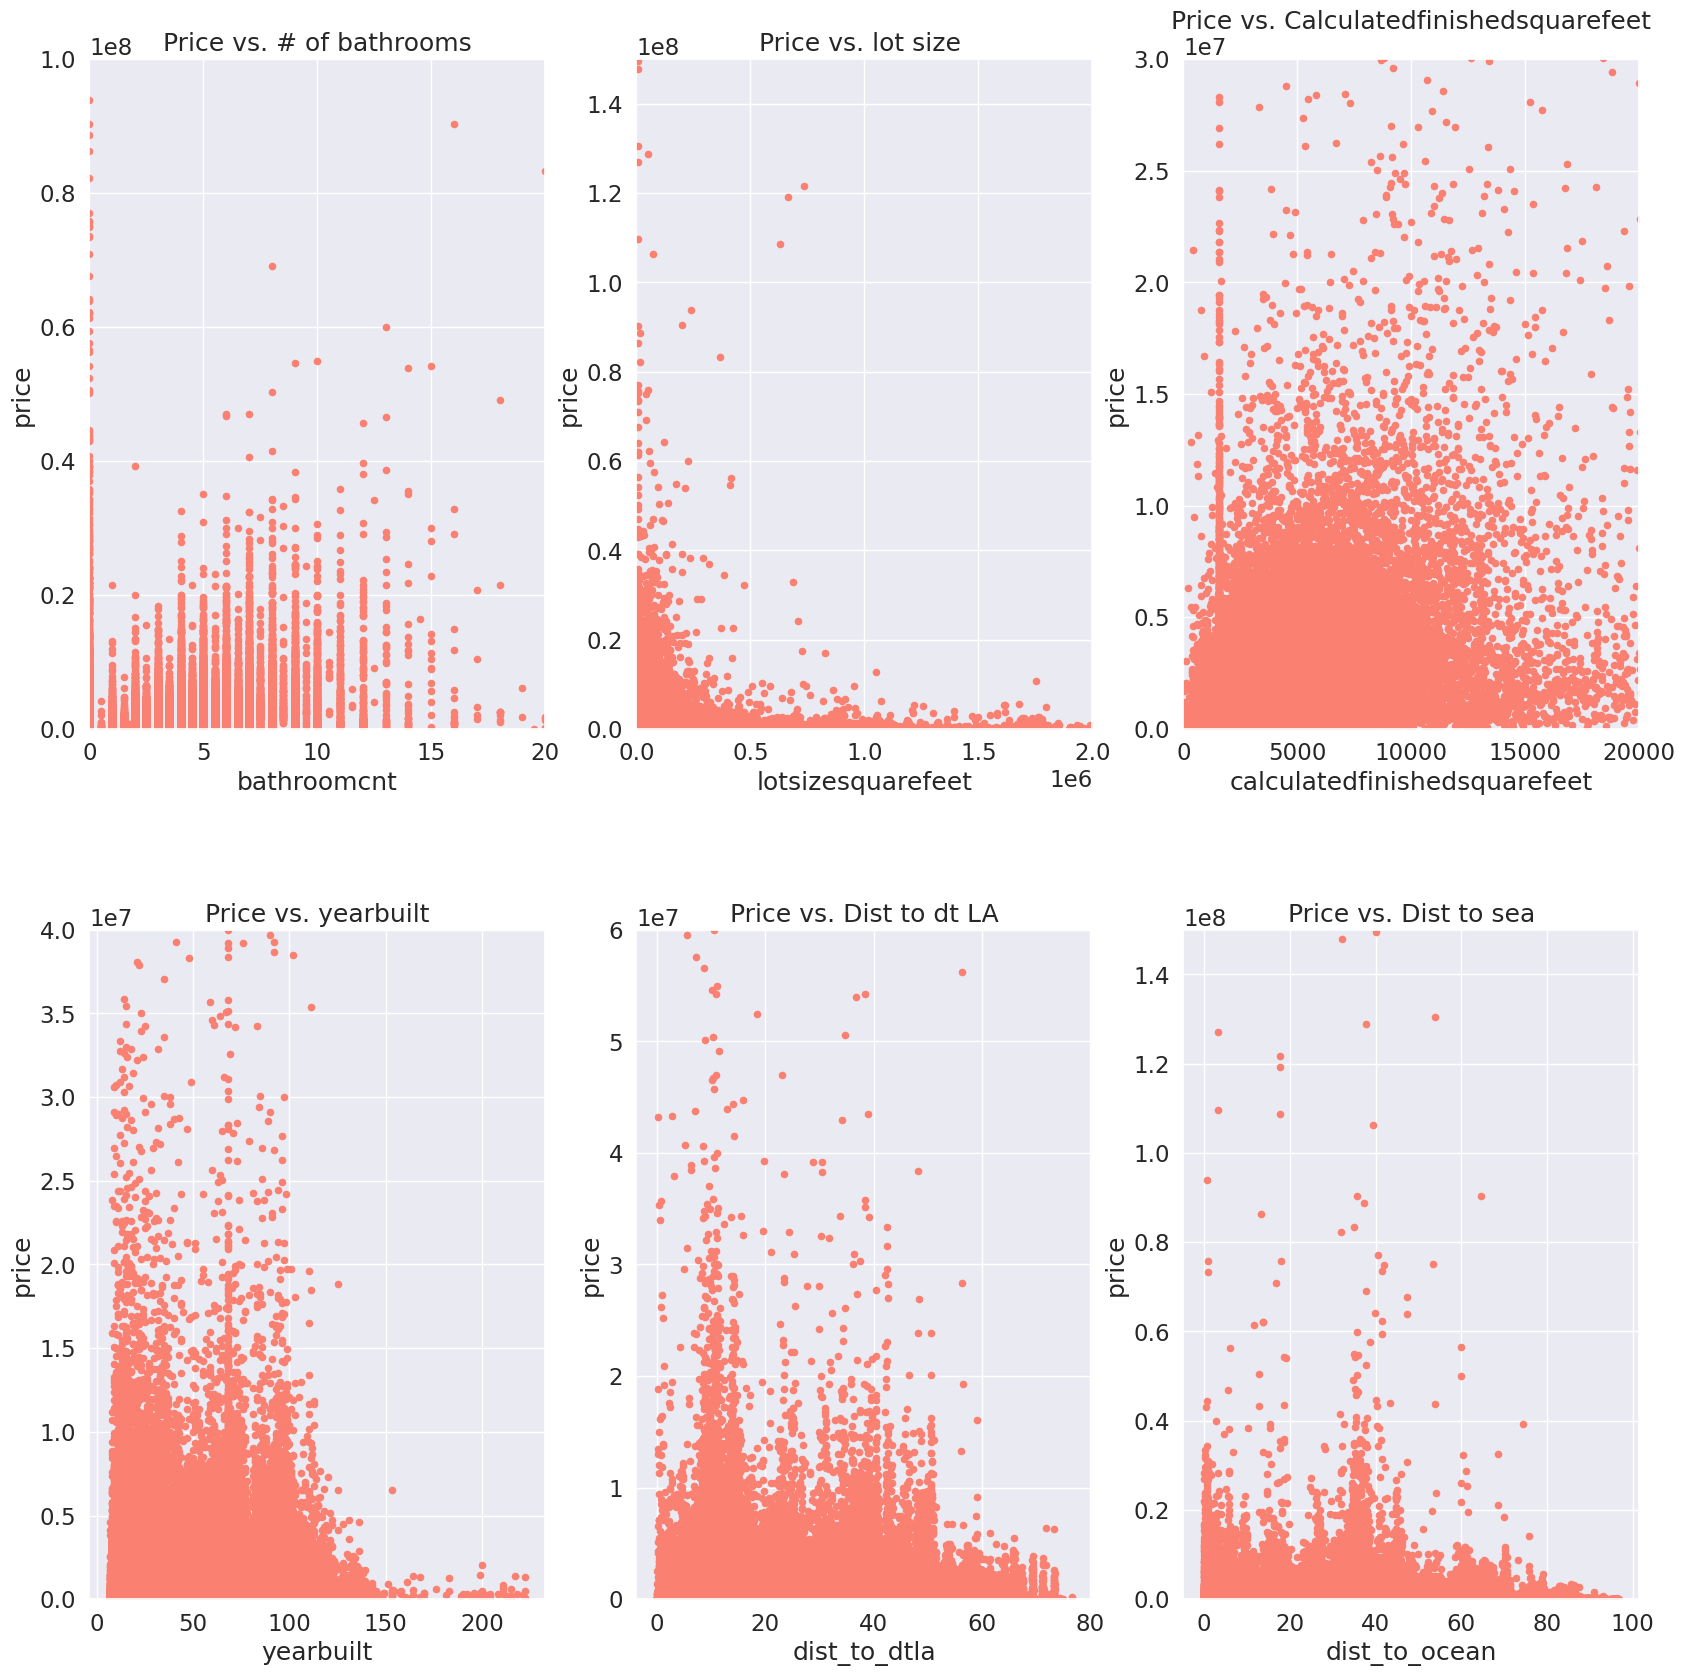

In [30]:
# visualize the relationship between the features and the response using scatterplots
#arrange layout
fig, axes = plt.subplots(nrows=2, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# scatter plot between # of bathrooms and price
train.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 0])
#remove cases when room count <20
axes[0, 0].set_xlim(0,20)
axes[0, 0].set_ylim(0,100000000)
axes[0, 0].set_title('Price vs. # of bathrooms')

# scatter plot between lot size and price
train.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 1])
#remove cases lot size > 200000
axes[0, 1].set_xlim(0,2000000)
axes[0, 1].set_ylim(0,150000000)
axes[0, 1].set_title('Price vs. lot size ')

# scatter plot between calculatedfinishedsquarefeet and price
train.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 2])
#plot area less than 200000squarefeet,remove outliers
axes[0, 2].set_xlim(0,20000)
axes[0, 2].set_ylim(0,30000000)
axes[0, 2].set_title('Price vs. Calculatedfinishedsquarefeet')

# scatter plot between yearbuilt and price
train.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'price',
        color = 'salmon',
        ax=axes[1, 0])
axes[1, 0].set_ylim(0,40000000)
axes[1, 0].set_title('Price vs. yearbuilt')

# scatter plot between distance to downtown LA and price
train.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'price',
        color = 'salmon',
        ax=axes[1, 1])
#axes[1, 2].set_xlim(1,30)
axes[1, 1].set_ylim(0,60000000)
axes[1, 1].set_title('Price vs. Dist to dt LA')

# scatter plot between distance to sea and price
train.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'price',
        color = 'salmon',
        ax=axes[1, 2])
#axes[1, 2].set_xlim(1,30)
axes[1, 2].set_ylim(0,150000000)
axes[1, 2].set_title('Price vs. Dist to sea')

plt.show()

**2.Mean of Residuals**

One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [33]:
residuals = Y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.393210509849283e-10


**3.Check for homoscedasticity**

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line.

Graphical Method:
plot the error terms against the predicted values. 
No particular pattern expected. If there is a definite pattern obtained from the scatter plot then heteroscedasticity is present.

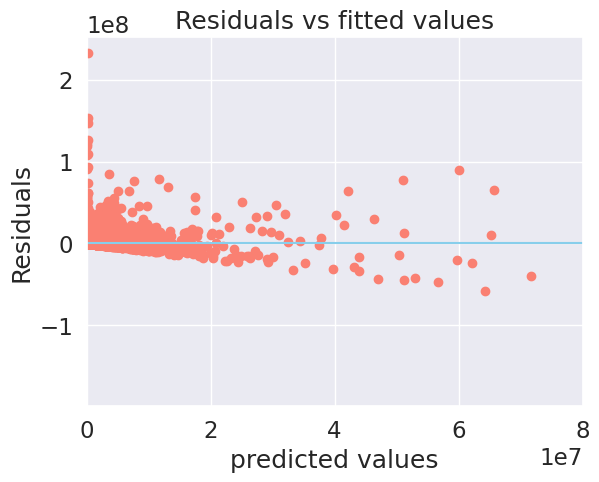

In [52]:
plt.scatter(y_pred, residuals, color = "salmon")
plt.xlabel('predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
plt.xlim(0,80000000)
plt.axhline(y = 0, color = 'skyblue', linestyle = '-')
plt.title('Residuals vs fitted values')

plt.show()

Linear pattern is observed, then heteroscedasticity is present.

**Using Goldfeld Quandt test for heteroscedasticity.**

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [53]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.043222472023281), ('p-value', 1.282487247835239e-117)]

Since p-value is approximately 0, we reject the null hypothesis, so heteroscedasticity is present. 

**4.Normality**

Using QQ-plot to check normality

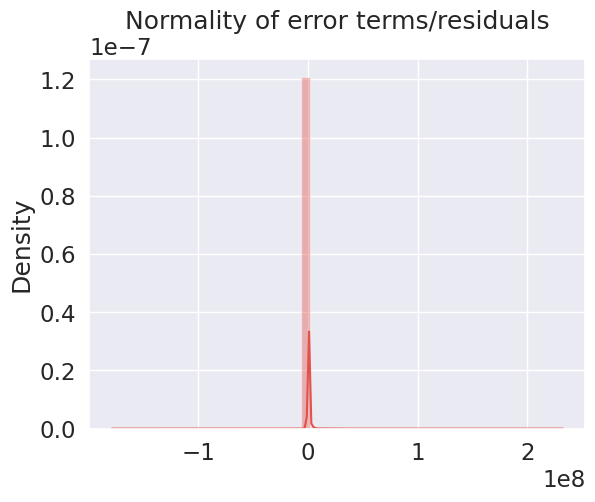

In [75]:
#distribution of residuals
#plt.hist(residuals, bins=6, color = "salmon")
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

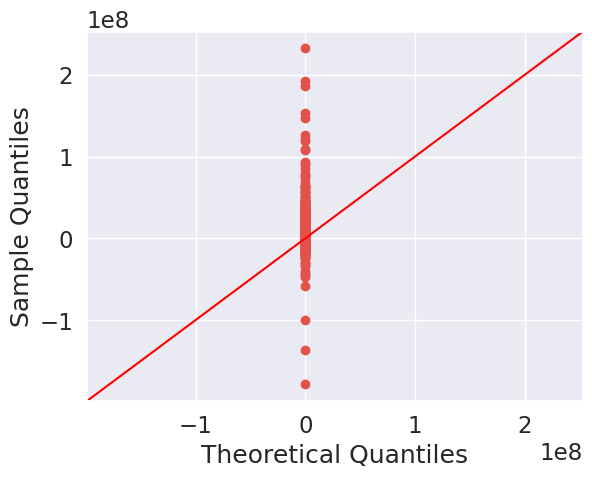

In [67]:
#QQ-Plot
import statsmodels.api as sm
import pylab as py

sm.qqplot(residuals, line ='45')
py.show()

# The data (after log transformation)

In [88]:
#do log transformation on full data
train['log_price'] = np.log(train['price'])
logY_train = np.log(Y_train)
logY_test = np.log(Y_test)

In [92]:
train.head(5)

,bathroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,propertylandusetypeid,yearbuilt,dist_to_dtla,dist_to_ocean,price,log_price
2041174,3.0,2504.0,10016.0,261.0,59,35.286148,23.991053,2.248706e+05,12.323280
2283238,2.0,1241.0,7000.0,266.0,40,43.633961,0.368414,1.000698e+06,13.816209
2356117,3.0,2132.0,4465.0,261.0,37,36.129586,30.596469,3.480662e+05,12.760148
2607777,2.0,1398.0,5500.0,261.0,48,37.352689,11.398171,9.996545e+04,11.512580
2594771,4.0,2728.0,2875.0,261.0,16,30.355475,0.638791,1.511237e+06,14.228439


## The model

In [93]:
regr_log = linear_model.LinearRegression()
regr_log.fit(X_train,logY_train)
logy_pred = regr_log.predict(X_train)

print("R squared: {}".format(r2_score(y_true=logY_train,y_pred=logy_pred)))

R squared: 0.2973312260010761


## Linear Assumption 

**1.Linearity**

Linear regression needs the relationship between the independent and dependent variables to be linear.

propertylandusetypeid is not plotted because it's categorical. 

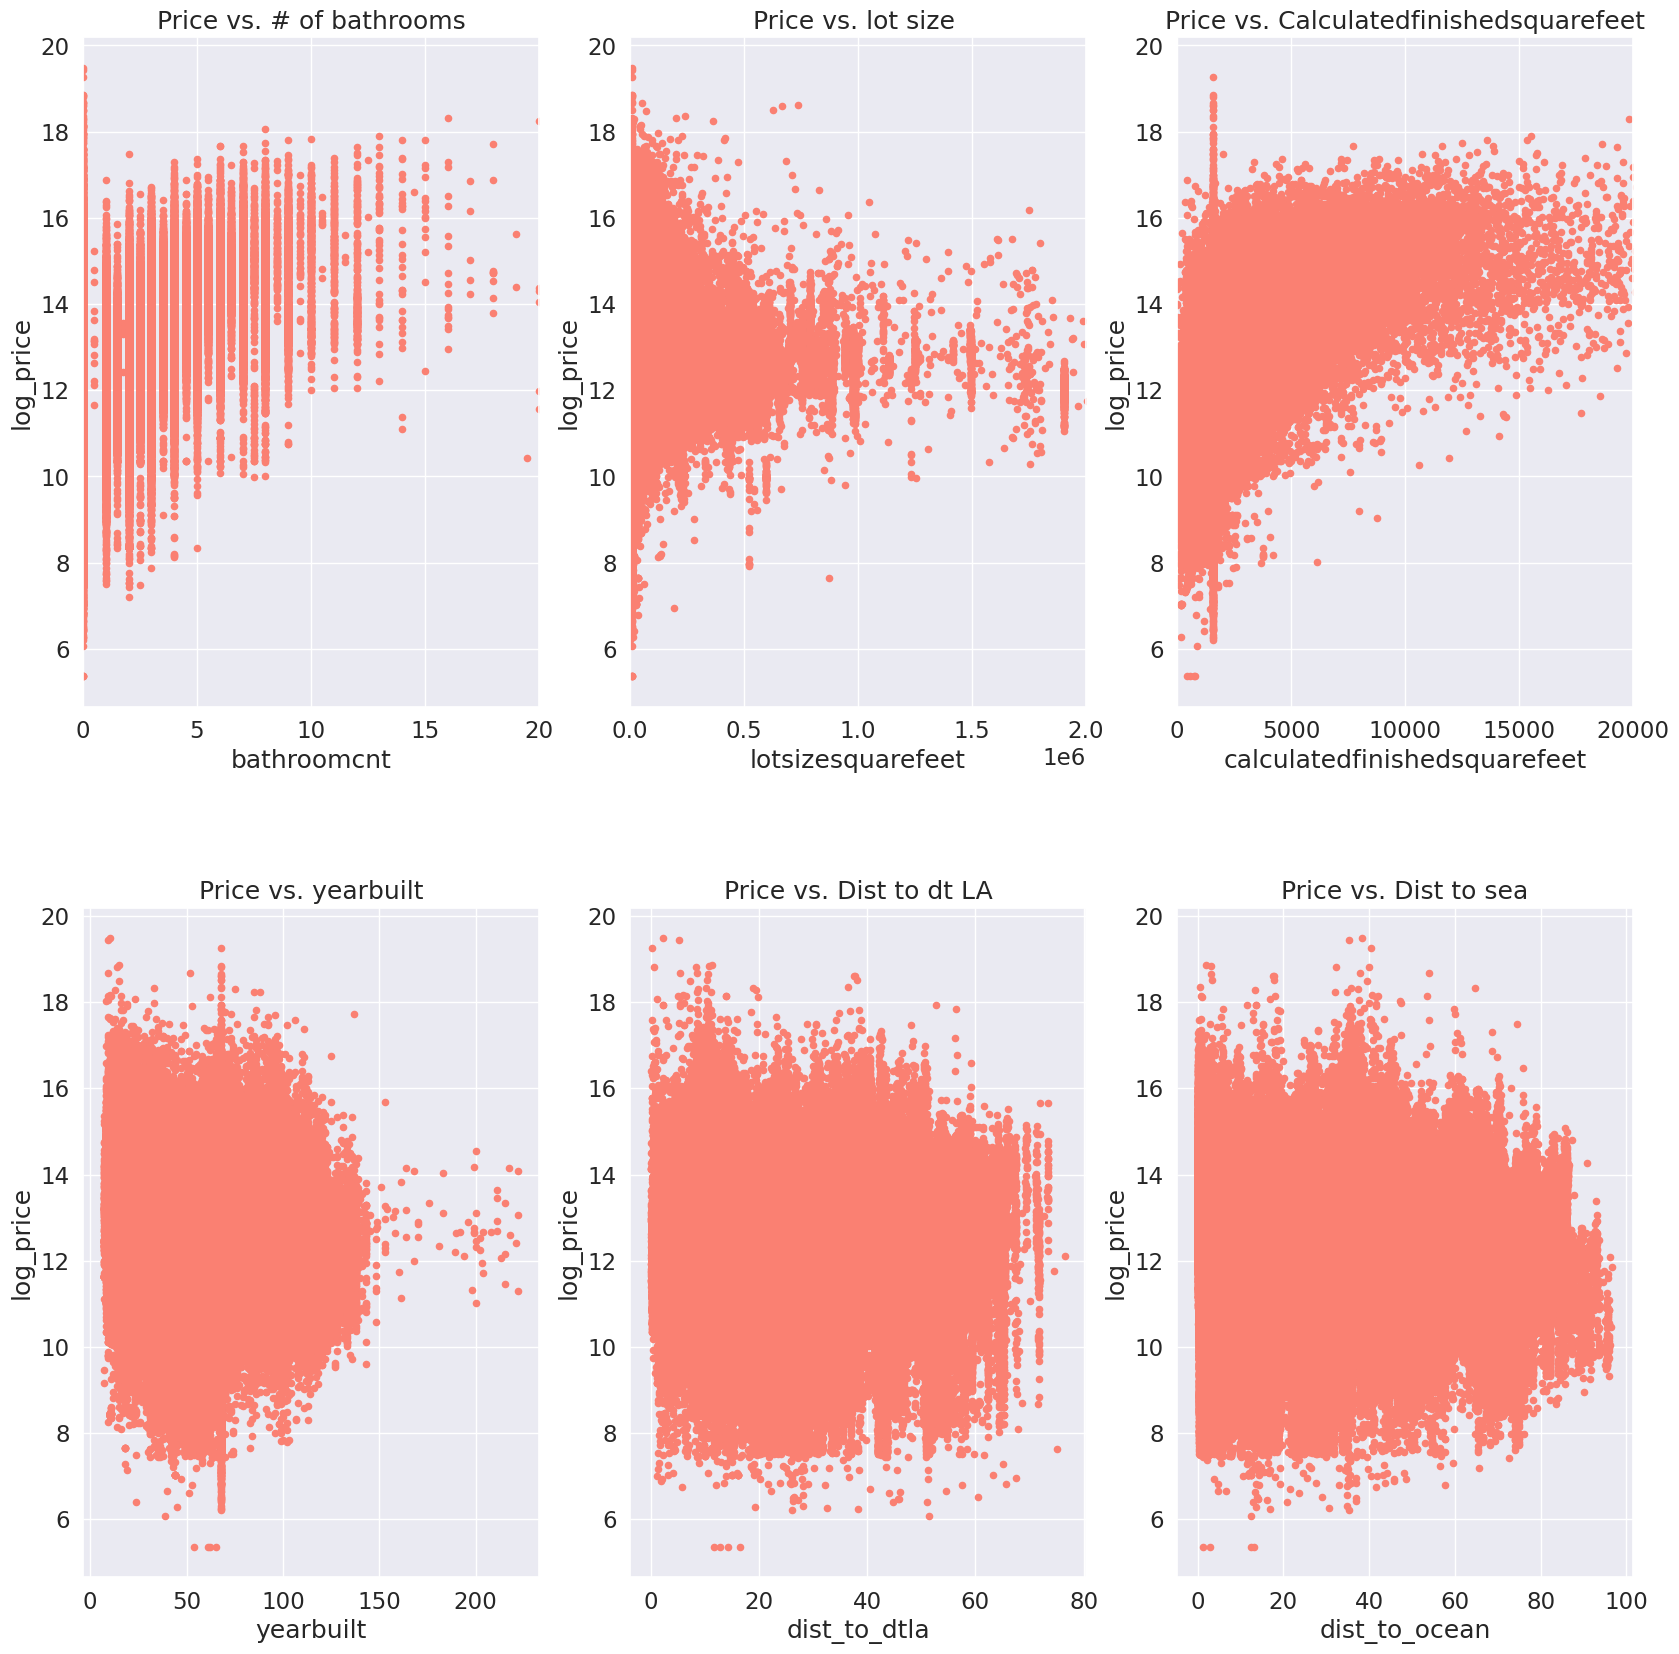

In [87]:
# visualize the relationship between the features and the response using scatterplots
#arrange layout
fig, axes = plt.subplots(nrows=2, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# scatter plot between # of bathrooms and price
train.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'log_price',
        color = 'salmon',
        ax=axes[0, 0])
#remove cases when room count <20
axes[0, 0].set_xlim(0,20)
#axes[0, 0].set_ylim(0,100000000)
axes[0, 0].set_title('Price vs. # of bathrooms')

# scatter plot between lot size and price
train.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'log_price',
        color = 'salmon',
        ax=axes[0, 1])
#remove cases lot size > 200000
axes[0, 1].set_xlim(0,2000000)
#axes[0, 1].set_ylim(0,150000000)
axes[0, 1].set_title('Price vs. lot size ')

# scatter plot between calculatedfinishedsquarefeet and price
train.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'log_price',
        color = 'salmon',
        ax=axes[0, 2])
#plot area less than 200000squarefeet,remove outliers
axes[0, 2].set_xlim(0,20000)
#axes[0, 2].set_ylim(0,30000000)
axes[0, 2].set_title('Price vs. Calculatedfinishedsquarefeet')

# scatter plot between yearbuilt and price
train.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'log_price',
        color = 'salmon',
        ax=axes[1, 0])
#axes[1, 0].set_ylim(0,40000000)
axes[1, 0].set_title('Price vs. yearbuilt')

# scatter plot between distance to downtown LA and price
train.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'log_price',
        color = 'salmon',
        ax=axes[1, 1])
#axes[1, 2].set_xlim(1,30)
#axes[1, 1].set_ylim(0,60000000)
axes[1, 1].set_title('Price vs. Dist to dt LA')

# scatter plot between distance to sea and price
train.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'log_price',
        color = 'salmon',
        ax=axes[1, 2])
#axes[1, 2].set_xlim(1,30)
#axes[1, 2].set_ylim(0,150000000)
axes[1, 2].set_title('Price vs. Dist to sea')

plt.show()

**2.Mean of Residuals**

In [96]:
residuals_log = logY_train.values - logy_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.393210509849283e-10


**3.Check for homoscedasticity **

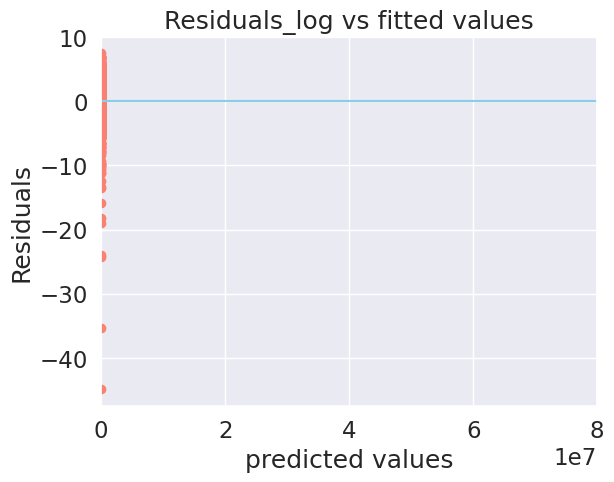

In [97]:
plt.scatter(logy_pred, residuals_log, color = "salmon")
plt.xlabel('predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
plt.xlim(0,80000000)
plt.axhline(y = 0, color = 'skyblue', linestyle = '-')
plt.title('Residuals_log vs fitted values')

plt.show()

**4.Normality**

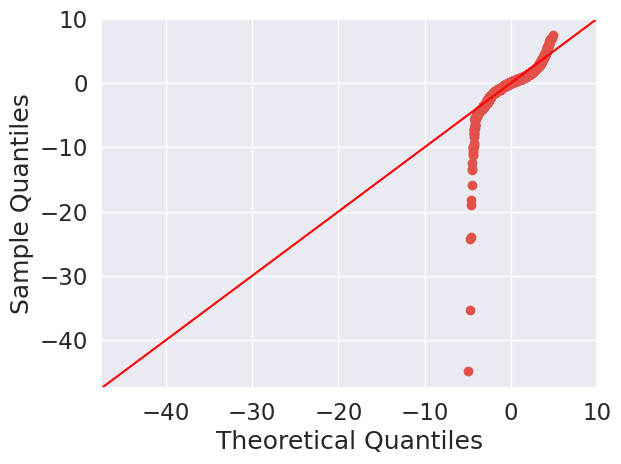

In [98]:
#QQ-Plot

sm.qqplot(residuals_log, line ='45')
py.show()